In [0]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.svm import SVC
from google.colab import drive
from sklearn.metrics import accuracy_score
drive.mount('/content/gdrive')
from os import listdir
from os.path import isfile, join
from PIL import Image
train_path = "faces/train/" # Training folder
test_path = "faces/test/" # Testing folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
x_train = np.zeros([178,65536])
x_test = np.zeros([35,65536])
y_train = [] # Class Labels
y_test = [] # Class Lables
i=0;
# Read Traning Images
for f in listdir(train_path):
  y_train.append(f.split('.')[1][0:2])
  image = np.array(Image.open(train_path+f))
  x_train[i,:] = np.reshape(image,(1,65536))
  i = i+1
i = 0
# Read Testing Images
for f in listdir(test_path):
  y_test.append(f.split('.')[1][0:2])
  image = np.array(Image.open(test_path+f))
  x_test[i,:] = np.reshape(image,(1,65536))
  i = i+1

In [0]:
# Without Kernel
clf = SVC(kernel = 'linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8285714285714286


In [0]:
# Poly Kernel
clf = SVC(kernel = 'poly',degree = 2)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8285714285714286


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    classes = unique_labels(y_true, y_pred)

    fig, ax = plt.subplots(figsize = (6,6),constrained_layout=True)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


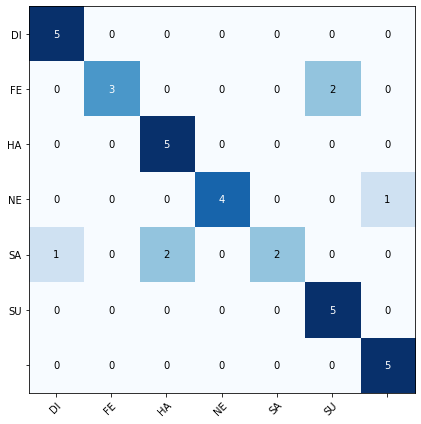

In [0]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_names = np.array(['AN','DI','FE','HA','SU','NE','SA'])

plot_confusion_matrix(y_test, y_pred,classes = ['AN','DI','FE','HA','SU','NE','SA'], title='Confusion Matrix')
# plt.figure(figsize=(20,20))
plt.show()
# confusion_matrix(y_test, y_pred,['AN','DI','FE','HA','SU','NE','SA'])

In [0]:
# RBF Kernel
clf = SVC(kernel = 'rbf',gamma = 0.00000009)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.5428571428571428


In [0]:
# Cosine Kernel
norm_train = np.zeros(len(x_train))
norm_test = np.zeros(len(x_test))
for i in range(len(x_train)):
  norm_train[i] = np.linalg.norm(x_train[i])
for i in range(len(x_test)):
  norm_test[i] = np.linalg.norm(x_test[i])

try:
  del gram_mat
except:
  print("y")
gram_mat = np.zeros([len(x_train),len(x_train)]) # Gram Matrix for training
for i in range(gram_mat.shape[0]):
  for j in range(i,gram_mat.shape[1]):
    temp = np.dot(x_train[i],x_train[j])/(norm_train[i]*norm_train[j]) # Cosine Function
    gram_mat[i,j] = temp
    gram_mat[j,i] = temp
# Training 
clf = SVC(kernel = "precomputed")
clf.fit(gram_mat,y_train)

try:
  del pred_mat
except:
  print("y")
pred_mat = np.zeros([len(x_test),len(x_train)]) # Prediction Matrix for Testing
for i in range(pred_mat.shape[0]):
  for j in range(pred_mat.shape[1]):
    temp = np.dot(x_test[i],x_train[j])/(norm_test[i]*norm_train[j]) # Cosine Function
    pred_mat[i,j] = temp
# Testing
y_pred = clf.predict(pred_mat)
print(accuracy_score(y_test, y_pred))

0.2571428571428571


In [0]:
# Tanh Kernel
a = 0.000000002
r = -2
try:
  del gram_mat
except:
  print("y")
gram_mat = np.zeros((len(x_train),len(x_train))) # Gram Matrix for Training
temp = 0
for i in range(gram_mat.shape[0]):
  for j in range(i,gram_mat.shape[1]):
    temp = np.tanh((a*np.dot(x_train[i,:],x_train[j,:])) + r) # Tanh Function
    gram_mat[i,j] = temp
    gram_mat[j,i] = temp
# Training
clf = SVC(kernel = "precomputed")
clf.fit(gram_mat,y_train)

try:
  del pred_mat
except:
  print("y")
pred_mat = np.zeros((len(x_test),len(x_train))) # Prediction Matrix for testing
temp = 0
for i in range(pred_mat.shape[0]):
  for j in range(pred_mat.shape[1]):
    temp = np.tanh((a*np.dot(x_test[i,:],x_train[j,:])) + r) # Tanh Function
    pred_mat[i,j] = temp
# Testing
y_pred = clf.predict(pred_mat)
print(accuracy_score(y_test, y_pred))


0.3142857142857143
